In [ ]:
import numpy as np
import cv2

array([[[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
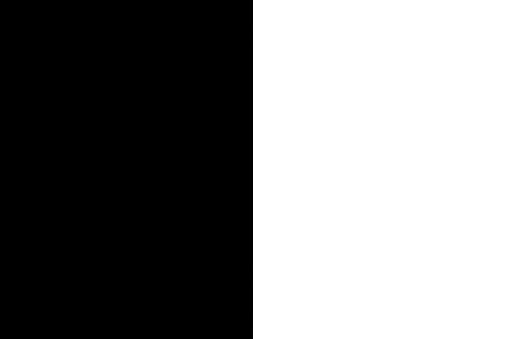

In [ ]:
image_path = r"/content/Image.jpg"

image = cv2.imread(image_path)
image


array([[  0,   0,   0, ..., 255, 255, 255],
       [  0,   0,   0, ..., 255, 255, 255],
       [  0,   0,   0, ..., 255, 255, 255],
       ...,
       [  0,   0,   0, ..., 255, 255, 255],
       [  0,   0,   0, ..., 255, 255, 255],
       [  0,   0,   0, ..., 255, 255, 255]], dtype=uint8)
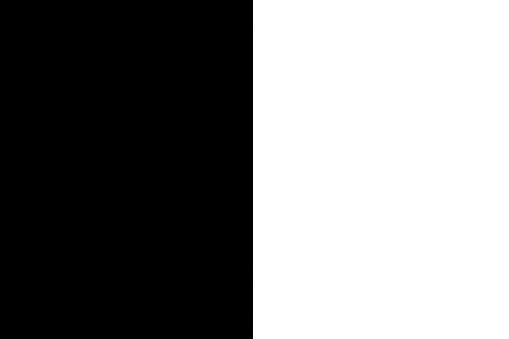

In [ ]:
## convert image to greyscale
import cv2
image = cv2.imread(image_path,cv2.IMREAD_GRAYSCALE)

image


In [ ]:
sobel_vertical = np.array([[-1,0,1],
                           [-2,0,2],
                           [-1,0,1]])
sobel_vertical

array([[-1,  0,  1],
       [-2,  0,  2],
       [-1,  0,  1]])

## Apply convolutional on image to detectt the edge
- Input image n = 339
- sober vertical , k =3
- shape of output image == n-k+1
((339-3+1),(509-3+1))==(337,507)

In [ ]:
## shape of image
print(f"Shape of greyscale image {image.shape}")

Shape of greyscale image (339, 509)


In [ ]:
rows,cols = image.shape
print(f"NO. of Rows in image {rows}")
print(f"No. of columns in image {cols}")

NO. of Rows in image 339
No. of columns in image 509


In [ ]:
## shape of kernel k
k = sobel_vertical.shape[0]

print(f"shape of kernel k = {k}")

shape of kernel k = 3


In [ ]:
## Assign output matrix of shape with initial values of zero
output_matrix = np.zeros((rows-k+1,cols-k+1))
output_matrix

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
# ## convert image to greyscale
# ## we have to chose the 3,3 box from the image
# for i in range(1,rows-1):
#   for j in range(1,cols-1):
#     region = image[i-1:i+2,j-1:j+2]
#     output_matrix[i-1,j-1] = np.sum(region*sobel_vertical) ## dot product of the region and the sibel vertical
#     # print(output_matrix)


In [ ]:
## we have to chose the 3,3 box from the image
for i in range(0,rows-2):
  for j in range(0,cols-2):
    region = image[i:i+3,j:j+3]
    output_matrix[i,j] = np.sum(region*sobel_vertical) ## dot product of the region and the sibel vertical
    # print(output_matrix)


In [ ]:
output_matrix

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

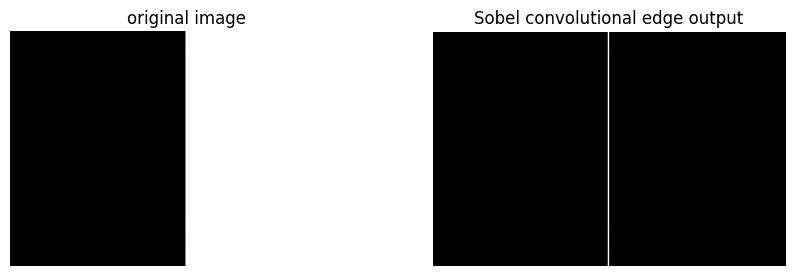

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,5))

#print origignal image
plt.subplot(1,2,1)
plt.title("original image")
plt.imshow(image,cmap="gray")
plt.axis("off")

plt.subplot(1,2,2)
plt.title("Sobel convolutional edge output")
plt.imshow(output_matrix,cmap="gray")
plt.axis("off")

plt.show()

(339, 509)

## same output can be done using cv2 filter


In [ ]:

sobel_output = cv2.filter2D(image,-1,sobel_vertical)
sobel_output.shape

(339, 509)

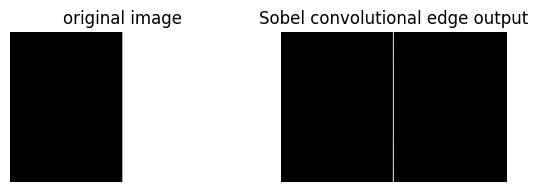

In [ ]:
import matplotlib.pyplot as plt
# fig = plt.figure(figsize=(10,5))

#print origignal image
plt.subplot(1,2,1)
plt.title("original image")
plt.imshow(image,cmap="gray")
plt.axis("off")

plt.subplot(1,2,2)
plt.title("Sobel convolutional edge output")
plt.imshow(sobel_output,cmap="gray")
plt.axis("off")

plt.show()

## KERNELS

array([[[140, 168, 175],
        [140, 168, 175],
        [140, 168, 175],
        ...,
        [126,  62,  74],
        [126,  62,  74],
        [126,  62,  74]],

       [[140, 168, 175],
        [140, 168, 175],
        [140, 168, 175],
        ...,
        [126,  62,  74],
        [126,  62,  74],
        [126,  62,  74]],

       [[140, 168, 175],
        [140, 168, 175],
        [140, 168, 175],
        ...,
        [128,  62,  74],
        [128,  62,  74],
        [128,  62,  74]],

       ...,

       [[ 41,  88,  86],
        [ 37,  84,  82],
        [ 32,  79,  77],
        ...,
        [251, 241, 241],
        [251, 241, 241],
        [251, 241, 241]],

       [[ 41,  88,  86],
        [ 37,  84,  82],
        [ 32,  79,  77],
        ...,
        [251, 241, 241],
        [251, 241, 241],
        [251, 241, 241]],

       [[ 40,  87,  85],
        [ 36,  83,  81],
        [ 31,  78,  76],
        ...,
        [251, 241, 241],
        [251, 241, 241],
        [251, 241, 241]]], dtype=uint8)
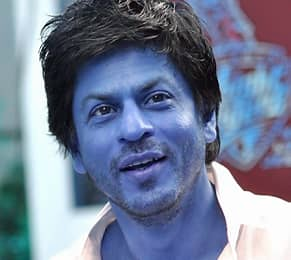

In [4]:
import cv2
import matplotlib.pyplot as plt
image = cv2.imread(r"/content/th.jpeg")
image

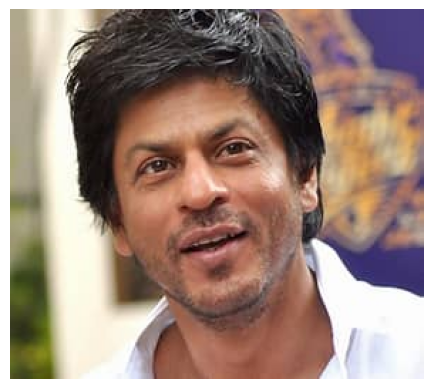

In [5]:
## open cv read the image as BGR , lets convert it to RGB
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.axis("off")
plt.imshow(image)

**1. Identitiy Kernel** - Returns exact copy of the image

Before we start lets understand the **arguments of cv2 filter**

The `cv2.filter2D` function in OpenCV is used to apply a custom filter to an image. This function performs convolution on the image with a specified kernel, which is useful for various image processing tasks such as blurring, sharpening, edge detection, and more.

Here's the function and an explanation of its arguments:

```python
cv2.filter2D(src, ddepth, kernel, dst=None, anchor=(-1, -1), delta=0, borderType=cv2.BORDER_DEFAULT)
```

### Arguments

1. **`src`**:  
   The source image to which the filter will be applied. It should be in grayscale or color format, depending on the intended effect of the filter.

2. **`ddepth`**:  
   The desired depth of the output image. For example:
   - `-1`: Keeps the output image depth the same as the source image.
   - `cv2.CV_32F`, `cv2.CV_64F`: Allows for a greater range of precision in the output.
   
   Choosing the depth carefully is important for ensuring that the filtered image maintains its quality, especially for complex filters.

3. **`kernel`**:  
   The filter kernel (or convolution matrix) that will be applied to the image. It’s a matrix that defines how neighboring pixels affect each other.  
   - It should be a 2D array or matrix, such as a `numpy` array.
   - The kernel size (e.g., 3x3, 5x5) influences how much the neighboring pixels contribute to each pixel’s new value.

4. **`dst`** (optional):  
   The destination image where the result will be stored. If not specified, a new image will be created to store the result.

5. **`anchor`** (optional):  
   The anchor point within the kernel, which indicates the "center" of the kernel.  
   - By default, it is set to `(-1, -1)`, meaning the anchor is at the kernel's center.
   - Changing the anchor affects the position at which the kernel is applied to each pixel in the image.

6. **`delta`** (optional):  
   A value added to each pixel after convolution. This can be used for brightness adjustments in the filtered image.

7. **`borderType`** (optional):  
   Specifies the pixel extrapolation method at the image borders. Common values include:
   - `cv2.BORDER_CONSTANT`: Pads with a constant value.
   - `cv2.BORDER_REPLICATE`: Pads by replicating the edge pixels.
   - `cv2.BORDER_REFLECT`: Reflects the image across its edges.
  
   This parameter is useful to control how pixels are managed at the boundaries when the filter kernel is larger than the image size.

# ** What is image depth**
Image depth, or bit depth, refers to the number of bits used to represent each pixel's color or intensity in an image. It affects how many colors or grayscale levels the image can display and influences the overall quality and file size of the image.

### Types of Image Depth

1. **Grayscale Images (Single-Channel)**
   - In grayscale images, each pixel represents an intensity level from black to white.
   - Common depths for grayscale images:
     - **8-bit**: Each pixel is represented by 8 bits (1 byte), giving 256 possible intensity levels (0 to 255).
     - **16-bit**: Each pixel has 16 bits, allowing 65,536 intensity levels (0 to 65535).

2. **Color Images (Multi-Channel)**
   - For color images, each pixel has multiple channels (usually Red, Green, and Blue).
   - The depth typically refers to the bit depth per channel.
     - **8-bit per channel (24-bit color)**: Each color channel (R, G, B) is represented by 8 bits, allowing 256 levels per channel. With 3 channels, this yields around 16.7 million colors (256 x 256 x 256).
     - **16-bit per channel (48-bit color)**: Each color channel has 16 bits, yielding around 281 trillion possible colors.

### How Depth Affects Image Quality and File Size

- **Higher Depths** provide finer color gradients and smoother transitions, which are crucial for high-quality graphics or scientific imaging.
- **Lower Depths** reduce file size but can introduce banding or loss of detail in high-contrast areas.
  
In OpenCV, when working with `cv2.filter2D` or other image processing functions, setting the output depth (e.g., `ddepth` parameter) can influence the precision and final appearance of the processed image. For example:
- `cv2.CV_8U` represents 8-bit unsigned depth (0-255), commonly used for display.
- `cv2.CV_16U` or `cv2.CV_32F` provide more depth, accommodating broader value ranges for operations requiring greater precision (e.g., sharpening, HDR images).


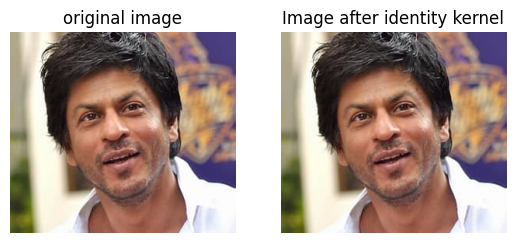

In [7]:
import numpy as np
identity_kernel = np.array([[0,0,0],
                   [0,1,0],
                   [0,0,0]])
identity = cv2.filter2D(src=image,ddepth=-1,kernel=identity_kernel)

plt.subplot(1,2,1)
plt.title("original image")
plt.imshow(image)
plt.axis("off")

plt.subplot(1,2,2)
plt.title("Image after identity kernel")
plt.imshow(identity)
plt.axis("off")

plt.show()

2. Blur using kernels

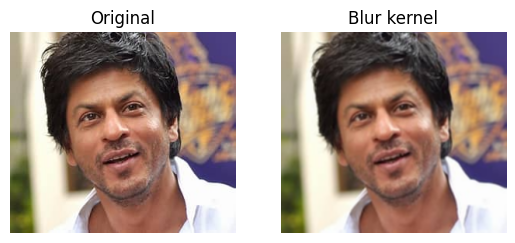

In [8]:
blur_kernel = np.array([[1/9,1/9,1/9],
                        [1/9,1/9,1/9],
                        [1/9,1/9,1/9]
                        ])
blur = cv2.filter2D(src=image,ddepth=-1,kernel=blur_kernel)
plt.subplot(1,2,1)
plt.imshow(image)
plt.title("Original")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(blur)
plt.title("Blur kernel")
plt.axis("off")

plt.show()

kernel size : 3  x  3


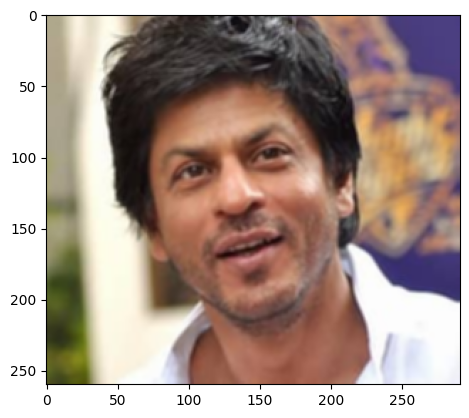


---------

kernel size : 4  x  4


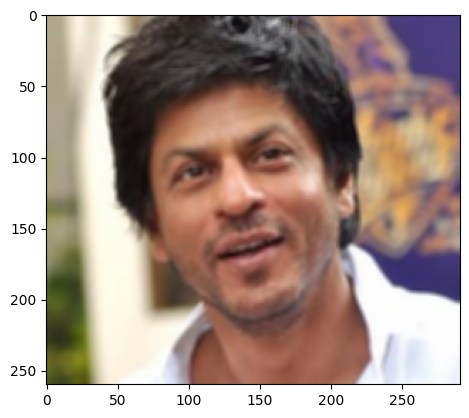


---------

kernel size : 5  x  5


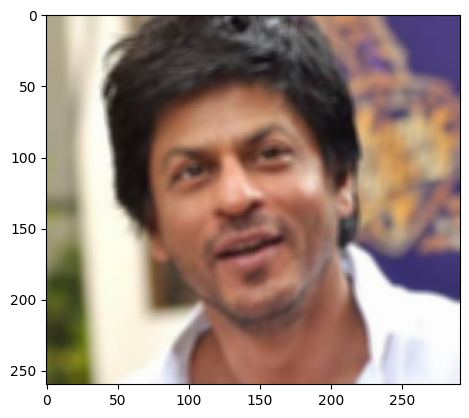


---------

kernel size : 6  x  6


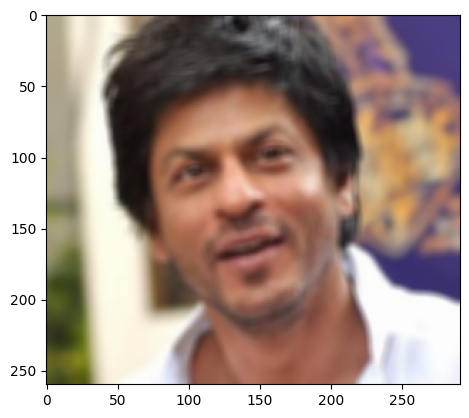


---------

kernel size : 7  x  7


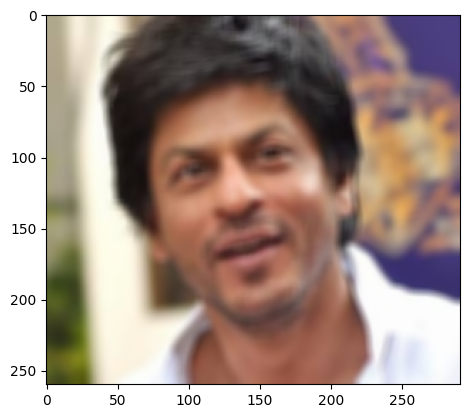


---------

kernel size : 8  x  8


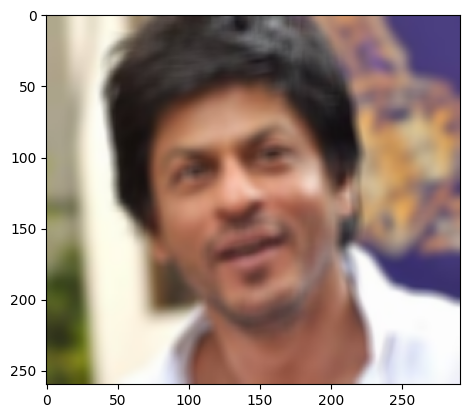


---------

kernel size : 9  x  9


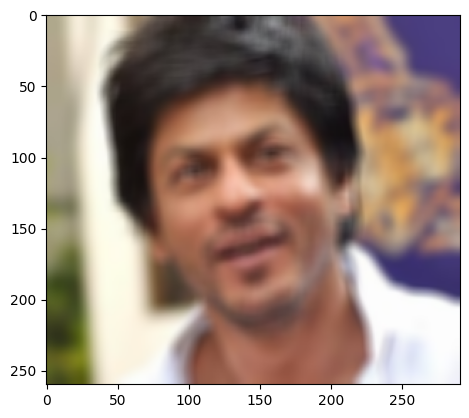


---------

kernel size : 10  x  10


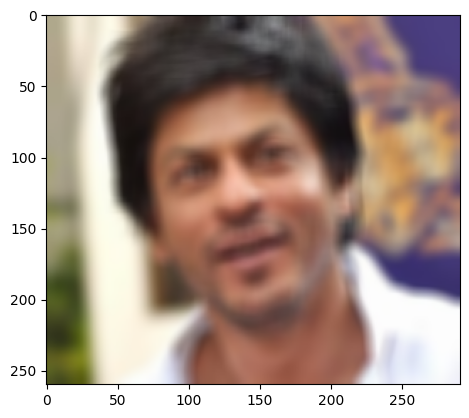


---------



In [14]:
## open cv method ofr blur
for n in range(3,11):
  print("kernel size :",n ," x ",n)
  imag_blur = cv2.blur(src=image,ksize=(n,n))
  plt.imshow(imag_blur)
  plt.show()
  print(f"\n---------\n")

3. Gaussina Blur
-- image is blurred and contrast is reduced

A Gaussian kernel matrix is used to apply Gaussian blur to an image, and it’s based on values from a Gaussian (bell curve) distribution. This kernel matrix has values that are highest at the center and gradually decrease towards the edges, creating a smooth, blurring effect when convolved with an image.

The matrix is often symmetric and square, typically with dimensions like 3x3, 5x5, 7x7, etc. Larger kernels provide a stronger blur effect.

Here's how a **3x3 Gaussian kernel** might look:

\[
\frac{1}{16} \begin{bmatrix} 1 & 2 & 1 \\ 2 & 4 & 2 \\ 1 & 2 & 1 \end{bmatrix}
\]

Each number represents the "weight" of that pixel in the convolution operation. When summed, the kernel weights equal 1, preserving the average brightness of the image.

In this kernel:
- The center value is the highest because it represents the main pixel.
- The surrounding values decrease with distance from the center, resulting in a softening effect when applied to an image.

### Formula for Gaussian Kernel

The values in a Gaussian kernel are derived using the **2D Gaussian function**:
!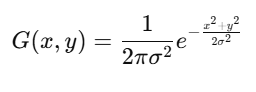


where:
- \((x, y)\) are coordinates relative to the center of the kernel.
- \(\sigma\) is the standard deviation, controlling the "spread" of the kernel. Larger \(\sigma\) results in a more spread-out kernel, producing a greater blur.




(-0.5, 290.5, 259.5, -0.5)

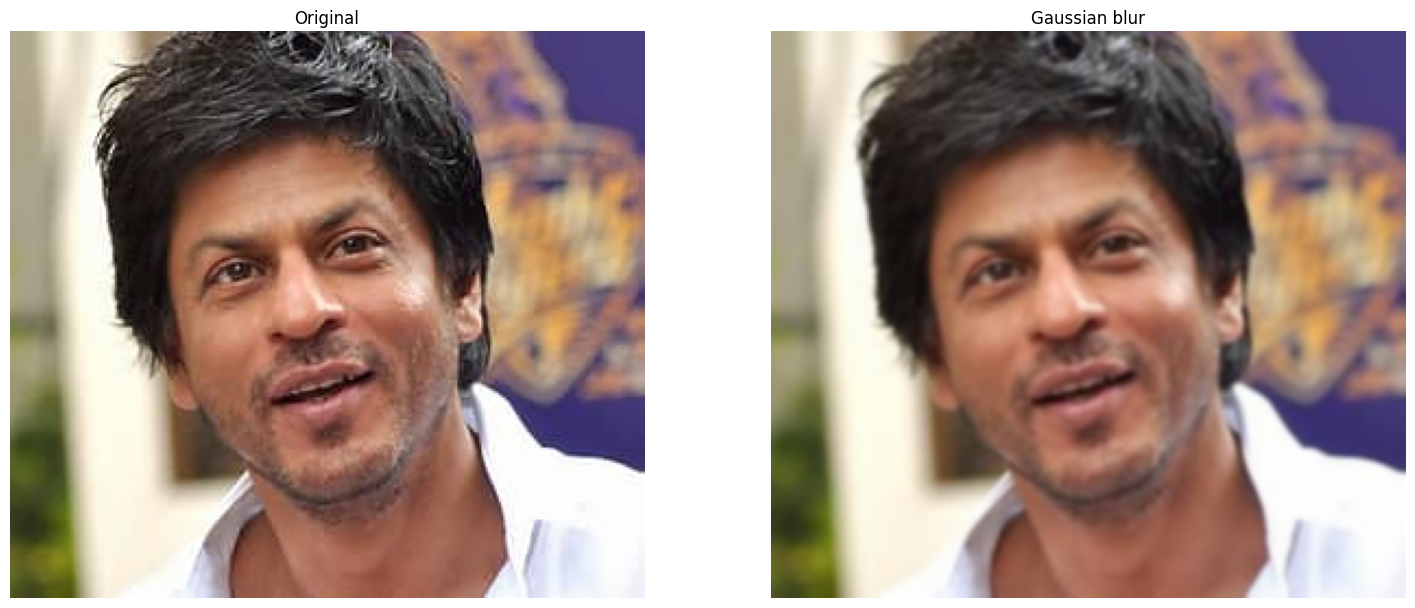

In [15]:
gaus_blur = cv2.GaussianBlur(src=image,ksize=(5,5),sigmaX=0)
plt.figure(figsize=(18,19))
plt.subplot(121)
plt.imshow(image)
plt.title('Original')
plt.axis("off")

plt.subplot(122)
plt.imshow(gaus_blur)
plt.title('Gaussian blur')
plt.axis("off")

4. Median Blur
-- center elemnt of image is replaced by median value of of all neighbouring pixels

**Median blur** is an image processing technique that reduces noise in an image while preserving the edges. Unlike Gaussian or mean blurs, which average pixel values, median blur replaces each pixel’s value with the median value of the neighboring pixels within a specified kernel size. This makes it particularly effective for removing "salt and pepper" noise.

### How Median Blur Works

1. A kernel of a specified size (e.g., 3x3, 5x5) is applied to each pixel in the image.
2. The pixel values within the kernel are sorted.
3. The center pixel is replaced with the median value of the sorted pixels, rather than the average.

### Benefits

- **Edge Preservation**: Median blur is excellent at preserving edges in an image, as it doesn’t introduce new colors or shades around edges.
- **Noise Reduction**: It’s particularly effective at reducing certain types of noise, especially salt-and-pepper noise, where pixels randomly take on maximum or minimum values.


(-0.5, 290.5, 259.5, -0.5)

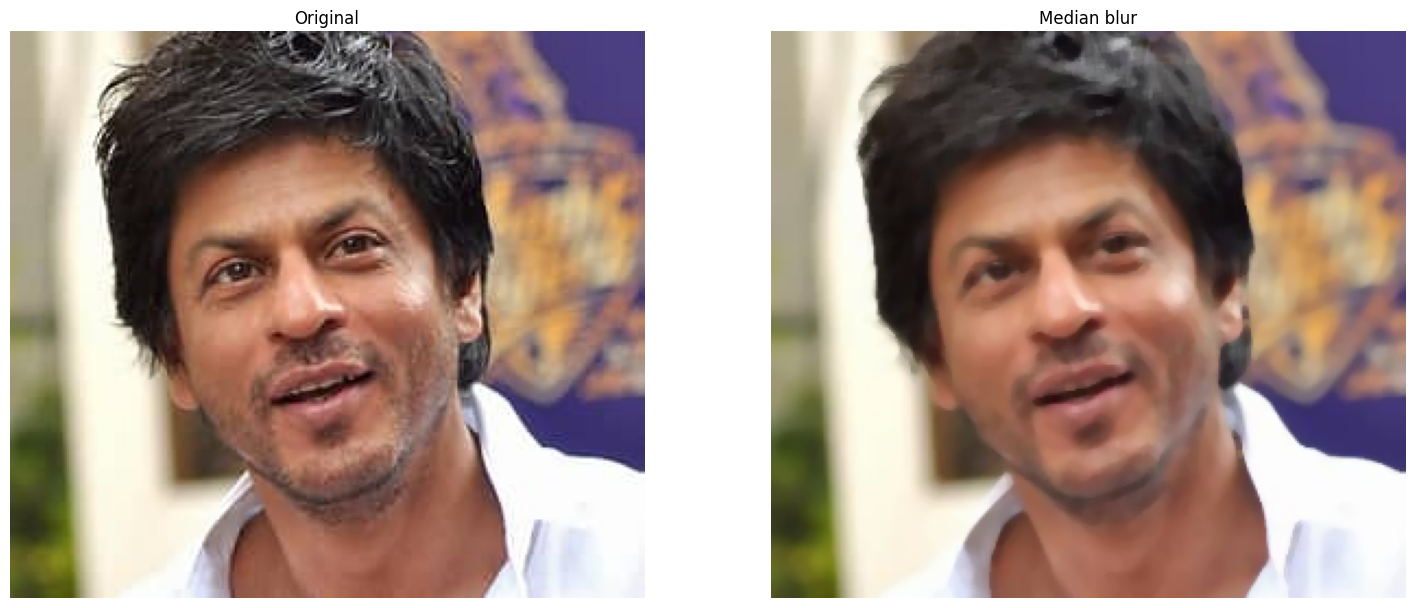

In [17]:
median = cv2.medianBlur(src=image,ksize=5)

plt.figure(figsize=(18,19))
plt.subplot(121)
plt.imshow(image)
plt.title('Original')
plt.axis("off")

plt.subplot(122)
plt.imshow(median)
plt.title('Median blur')
plt.axis("off")


5. Sharpen using kernels
-- replace the central element of an image by an amplified version of the same

(-0.5, 290.5, 259.5, -0.5)

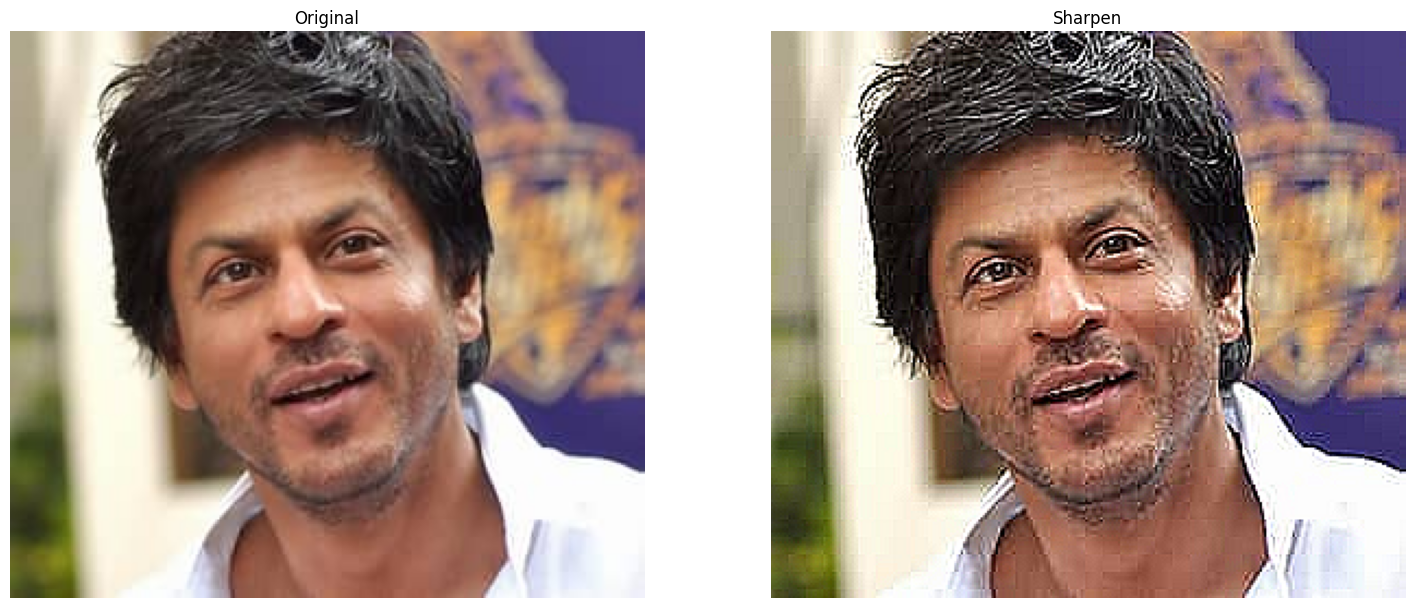

In [16]:
sharpen_kernel =  np.array([[0,-1,0],
                     [-1,5,-1],
                     [0,-1,0]])

sharpen = cv2.filter2D(src=image,ddepth=-1,kernel=sharpen_kernel)
plt.figure(figsize=(18,19))
plt.subplot(121)
plt.imshow(image)
plt.title('Original')
plt.axis("off")

plt.subplot(122)
plt.imshow(sharpen)
plt.title('Sharpen')
plt.axis("off")

6. Bilateral Filtering

**Bilateral filtering** is an advanced image smoothing technique that reduces noise while preserving edges. Unlike standard blurring methods (e.g., Gaussian blur), which smooth out edges along with noise, bilateral filtering selectively smooths similar pixel values while maintaining the edges, making it ideal for applications that require noise reduction without sacrificing detail, such as facial feature preservation in photos.

### How Bilateral Filtering Works

Bilateral filtering uses two types of Gaussian functions:
1. **Spatial Gaussian**: This considers the pixel’s distance from the center pixel in the kernel. Pixels closer to the center have more influence on the result, similar to a standard Gaussian blur.
2. **Range Gaussian**: This considers the color intensity difference between the neighboring pixel and the center pixel. Pixels with similar intensity values have more influence, while those with significantly different intensities have less.

These two Gaussians help preserve edges by reducing the effect of pixels with high intensity differences (edges) and focusing more on pixels with similar colors within the spatial distance.

### Bilateral Filtering Formula

The new value for a pixel \( p \) is calculated as:

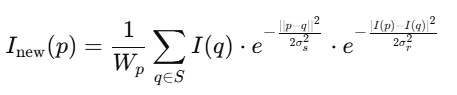\

where:
- \( S \) is the spatial neighborhood.
- \( I(p) \) and \( I(q) \) are the intensity values of pixels \( p \) and \( q \), respectively.
- \( \sigma_s \) controls the spatial Gaussian (filter size).
- \( \sigma_r \) controls the range Gaussian (intensity similarity).
- \( W_p \) is a normalizing factor to ensure that the weights sum to 1.

### Example of Applying Bilateral Filtering in OpenCV

You can apply bilateral filtering using OpenCV’s `cv2.bilateralFilter` function:

```python
import cv2

# Apply bilateral filter
filtered_image = cv2.bilateralFilter(image, d=9, sigmaColor=75, sigmaSpace=75)
```

- **Parameters**:
  - `image`: The input image.
  - `d`: Diameter of the pixel neighborhood (e.g., 9). A larger diameter allows more surrounding pixels to influence the center pixel.
  - `sigmaColor`: The filter’s sensitivity to color differences. Larger values mean pixels with larger color differences are considered.
  - `sigmaSpace`: The filter’s sensitivity to pixel distance. Larger values allow a broader spatial area to affect each pixel.

### Benefits of Bilateral Filtering

- **Edge Preservation**: Bilateral filtering preserves edges very well by reducing the influence of pixels with different intensities.
- **Selective Smoothing**: It smooths areas with similar color intensities while keeping sharp changes intact.

### Drawbacks

- **Computationally Expensive**: Due to its dual Gaussian approach, bilateral filtering is slower than other filters, particularly for large images and high filter sizes.
  
Bilateral filtering is commonly used in applications requiring high-quality denoising without losing sharpness, such as portrait photography and medical imaging.

(-0.5, 290.5, 259.5, -0.5)

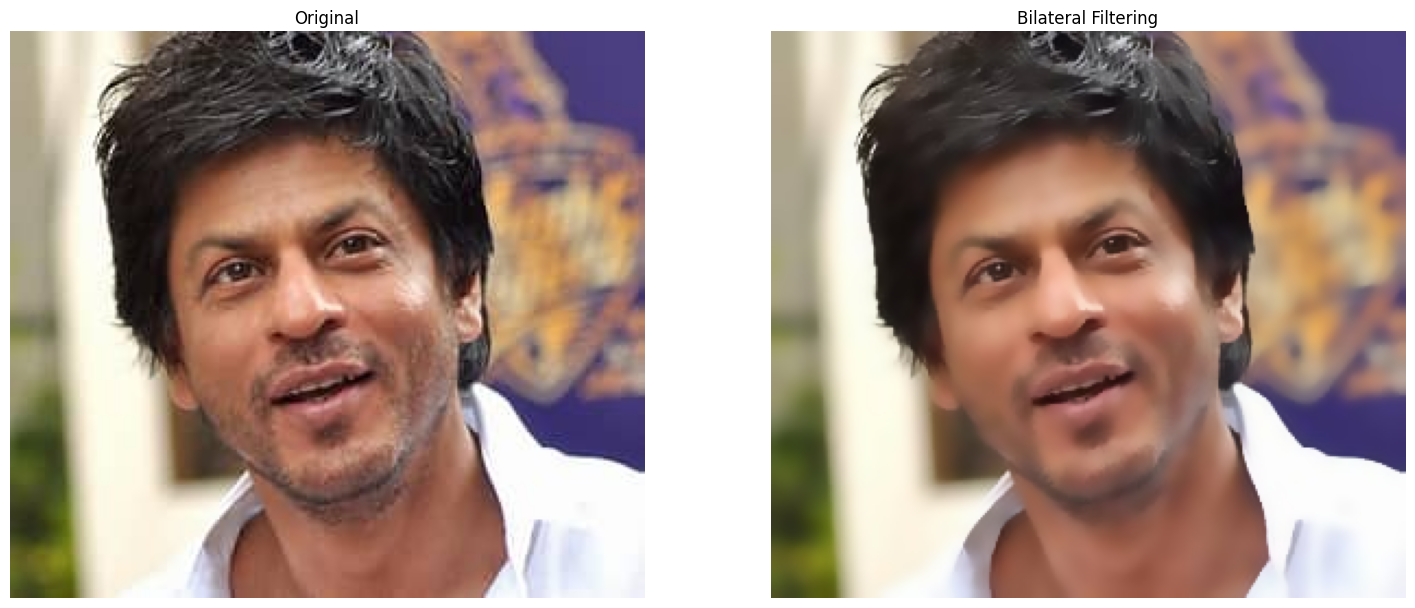

In [19]:
bf = cv2.bilateralFilter(src=image,d=9,sigmaColor=75,sigmaSpace=75)

plt.figure(figsize=(18,19))
plt.subplot(121)
plt.imshow(image)
plt.title('Original')
plt.axis("off")

plt.subplot(122)
plt.imshow(bf)
plt.title('Bilateral Filtering')
plt.axis("off")